In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For NLP(text cleaning)
import nltk
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# For NLP(feature extraction)
from sklearn.feature_extraction.text import TfidfVectorizer

# For dimension reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# For clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# For file handeling operations
import os
from glob import glob
from tqdm import tqdm

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style("dark")

## Read the data

In [3]:
# Absolute path of all the .txt files


bbc_news = pd.read_csv(r"C:\Users\taah\Desktop\news_clustering_data.csv")

cols = [1,2,3,5]
bbc_news= bbc_news[bbc_news.columns[cols]]

#news_articles = bbc_news["Text"]



In [4]:
bbc_news

,Category,Content,Link,Title
0,Business,As the world’s largest — and one of its most u...,https://www.aljazeera.com/economy/2024/5/8/a-n...,"Should India take from the rich, give the poor..."
1,Business,Air safety officials in the United States are ...,https://www.aljazeera.com/economy/2024/5/7/us-...,US officials probe allegations Boeing workers ...
2,Business,– When Aamir Dhedhi took his mother to India i...,https://www.aljazeera.com/news/2024/5/8/pakist...,Pakistan bets on a cannabis high as its econom...
3,Business,Amazon has announced plans to invest $9bn in S...,https://www.aljazeera.com/economy/2024/5/7/ama...,Amazon to invest $9bn in Singapore to expand c...
4,Business,Elon Musk suggested testing Tesla’s full self-...,https://www.aljazeera.com/economy/2024/5/8/elo...,"Elon Musk floated robotaxi launch in China, Ch..."
...,...,...,...,...
158,Sports,Denver Nuggets star Nikola Jokic was named the...,https://www.nbcnews.com/news/sports/nuggets-st...,Nuggets star Nikola Jokic wins 2024 NBA MVP aw...
159,Sports,INDIANAPOLIS — Indianapolis police announced W...,https://www.nbcnews.com/news/sports/milwaukee-...,Police investigating after Milwaukee Bucks pla...
160,Sports,An Indianapolis sports columnist will not be c...,https://www.nbcnews.com/news/us-news/indystar-...,IndyStar columnist won't cover Caitlin Clark a...
161,Sports,"Three-time , 34, is making his way from to ...",https://www.nbcnews.com/pop-culture/pop-cultur...,Travis Kelce lands first major acting role in ...


In [5]:
news_articles = bbc_news["Content"]

In [6]:
news_articles[0]

'As the world’s largest — and one of its most unequal — democracies votes in a mammoth national election, a new debate has gripped the campaigns of both Prime Minister Narendra Modi’s ruling Bharatiya Janata Party (BJP) and the opposition Congress party. At the heart of this latest political slugfest is the idea of a potential redistribution of wealth. But while the Congress party has alluded to the need for some resources to be reallocated to traditional marginalised economic and caste-based communities, Modi and the BJP have accused the opposition of plotting to hand over wealth from Hindu households to Muslims. So what’s the controversy about and what do economists say about the proposals for a relook at India’s wealth distribution? In April, Rahul Gandhi, a scion of the Nehru-Gandhi political dynasty, said if voted to office, his Congress party would conduct a caste census along with an economic and institutional survey to determine who owns what and earns how much. Following this,

In [7]:
# Create a stemmer object which will be used to stem all the words to its root
ps = PorterStemmer()

## Cleaning the Data

In [8]:
# Empty list to store the clean text
nltk.download('stopwords')

clean_articles = []

for article in tqdm(news_articles, colour='yellow'):
    # Replace the end lines <\n>
    article = article.replace("\\n",'')
    
    # Remove all excepth the alphabets
    article = re.sub("[^a-zA-Z]",' ', article)
    
    # Lower all the aplhabets
    article = article.lower()
    
    # Split the article on spaces, returning a list of words
    words = article.split()
    
   # Remove stopwords
    clean_article = [ps.stem(word) for word in words if not word in stopwords.words("english")]
    
    # Join clean words
    clean_article = " ".join(clean_article)
    
    # Append the news
    clean_articles.append(clean_article)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 163/163 [00:25<00:00,  6.30it/s]


In [9]:
clean_articles[0]

'world largest one unequ democraci vote mammoth nation elect new debat grip campaign prime minist narendra modi rule bharatiya janata parti bjp opposit congress parti heart latest polit slugfest idea potenti redistribut wealth congress parti allud need resourc realloc tradit marginalis econom cast base commun modi bjp accus opposit plot hand wealth hindu household muslim controversi economist say propos relook india wealth distribut april rahul gandhi scion nehru gandhi polit dynasti said vote offic congress parti would conduct cast censu along econom institut survey determin own earn much follow portion trillion rupe bn benefit given big businessmen modi govern would transfer percent countri peopl start point deliv social justic said gandhi describ cast censu x ray indian societi polit issu life mission gandhi said write forc stop cast censu congress parti manifesto talk directli redistribut wealth say address grow inequ wealth incom suitabl chang polici cast base censu say congress c

## Vectorizing text

In [10]:
# Initialize a vectorizer object
tfidf = TfidfVectorizer()

# Fit transform the clean article to create vectors
article_vectors = tfidf.fit_transform(clean_articles)

## Dimensionality reduction

In [11]:
# Initialize a SVD object
svd = TruncatedSVD(2000)

# Transform the data
reduced_articles = svd.fit_transform(article_vectors)

## KMEANS Clustering

In [49]:
# To store sum  of squared distances for each number of cluster
SSD = []

# For each number of cluster k
for k in tqdm(range(2,10), colour='yellow'):
    # Initialize a model
    km = KMeans(n_clusters=k)
    # Fit the model
    km = km.fit(reduced_articles)
    # Append the sum of squared distances
    SSD.append(km.inertia_)

100%|██████████| 8/8 [00:00<00:00, 136.81it/s]


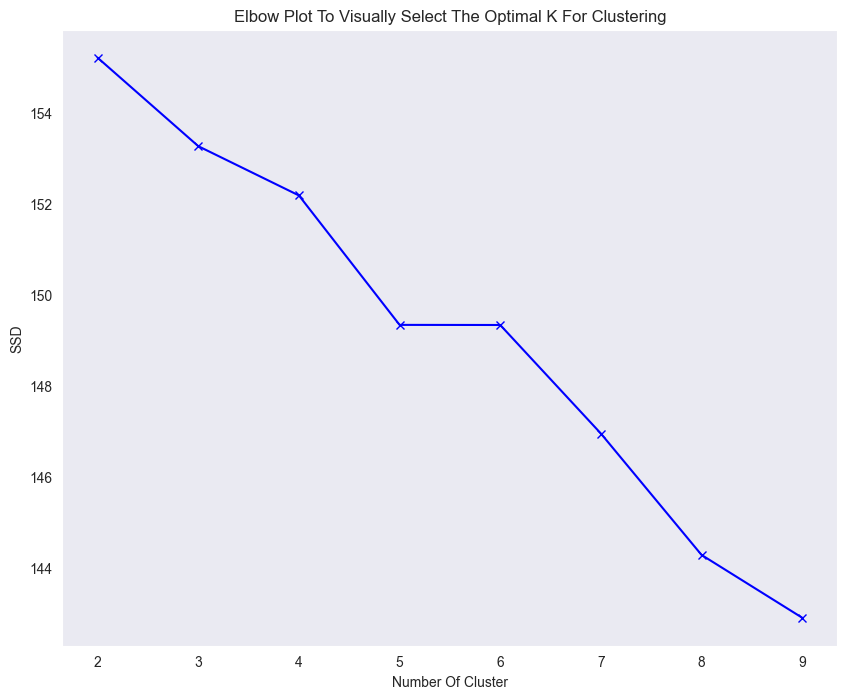

In [50]:
# Ploting an elbow plot (Num of clusters VS Sum of squared distances)
plt.figure(figsize=(10,8))
plt.title("Elbow Plot To Visually Select The Optimal K For Clustering")
plt.plot(range(2,10),SSD,'bx-')
plt.xlabel("Number Of Cluster")
plt.ylabel("SSD")
plt.show()

In [51]:
# Initialize the model
kmeans = KMeans(n_clusters=5)

# Fit on the data
kmeans.fit(reduced_articles)

# Get the labels
labels = kmeans.labels_

In [52]:
bbc_news["clusters"] = labels

In [53]:
bbc_news['clusters'].value_counts()


clusters
4    64
3    43
1    38
2    17
0     1
Name: count, dtype: int64

In [54]:
bbc_news

,Category,Content,Link,Title,clusters
0,Business,As the world’s largest — and one of its most u...,https://www.aljazeera.com/economy/2024/5/8/a-n...,"Should India take from the rich, give the poor...",1
1,Business,Air safety officials in the United States are ...,https://www.aljazeera.com/economy/2024/5/7/us-...,US officials probe allegations Boeing workers ...,4
2,Business,– When Aamir Dhedhi took his mother to India i...,https://www.aljazeera.com/news/2024/5/8/pakist...,Pakistan bets on a cannabis high as its econom...,1
3,Business,Amazon has announced plans to invest $9bn in S...,https://www.aljazeera.com/economy/2024/5/7/ama...,Amazon to invest $9bn in Singapore to expand c...,4
4,Business,Elon Musk suggested testing Tesla’s full self-...,https://www.aljazeera.com/economy/2024/5/8/elo...,"Elon Musk floated robotaxi launch in China, Ch...",1
...,...,...,...,...,...
158,Sports,Denver Nuggets star Nikola Jokic was named the...,https://www.nbcnews.com/news/sports/nuggets-st...,Nuggets star Nikola Jokic wins 2024 NBA MVP aw...,2
159,Sports,INDIANAPOLIS — Indianapolis police announced W...,https://www.nbcnews.com/news/sports/milwaukee-...,Police investigating after Milwaukee Bucks pla...,2
160,Sports,An Indianapolis sports columnist will not be c...,https://www.nbcnews.com/news/us-news/indystar-...,IndyStar columnist won't cover Caitlin Clark a...,2
161,Sports,"Three-time , 34, is making his way from to ...",https://www.nbcnews.com/pop-culture/pop-cultur...,Travis Kelce lands first major acting role in ...,3


In [55]:
#saving as a pickle 
import pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)